In [2]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from imblearn.over_sampling import SMOTE
import itertools

In [4]:
data_cr = pd.read_csv('./data/creditcard.csv' , encoding='latin-1') #读取数据
data_cr.head() #查看表格默认前5行

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [5]:
#查看数据集的大小
data_cr.shape

(284807, 31)

In [7]:
#查看数据基本情况
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
#查看数据基本统计信息
data_cr.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


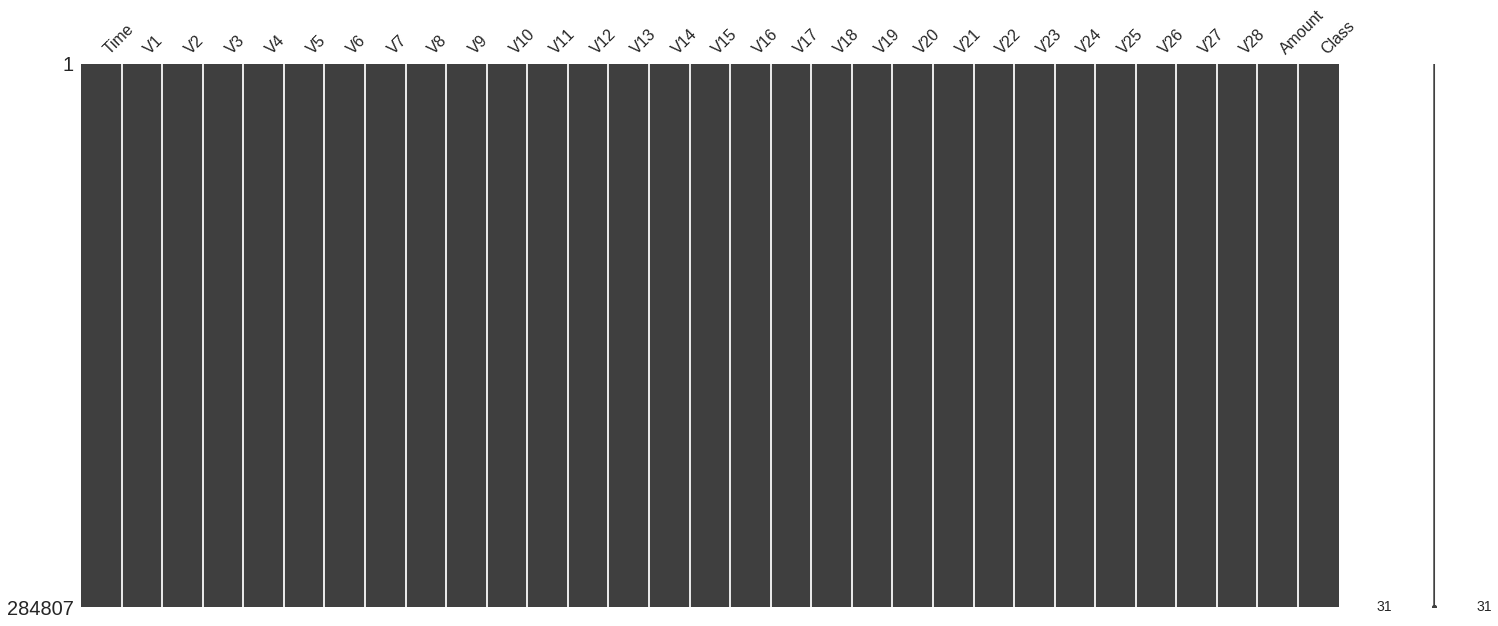

In [9]:
#查看数据的缺失情况
msno.matrix(data_cr)

In [ ]:
#得出的结论就是数据不存在缺失的情况


### ３．特征工程


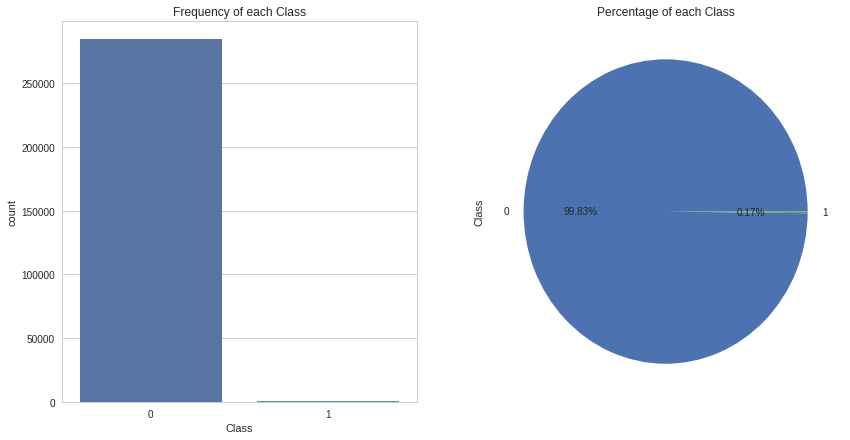

In [12]:
# 目标变量分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=data_cr,ax=axs[0])
axs[0].set_title("Frequency of each Class")
data_cr['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [13]:
# 查看目标列的情况
data_cr.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [ ]:
#数据不均衡的问题

### 1.特征衍生

In [22]:
data_cr['Hour'] =data_cr["Time"].apply(lambda x : divmod(x, 3600)[0]) #单位转换

### 2.特征选择（数据探索）

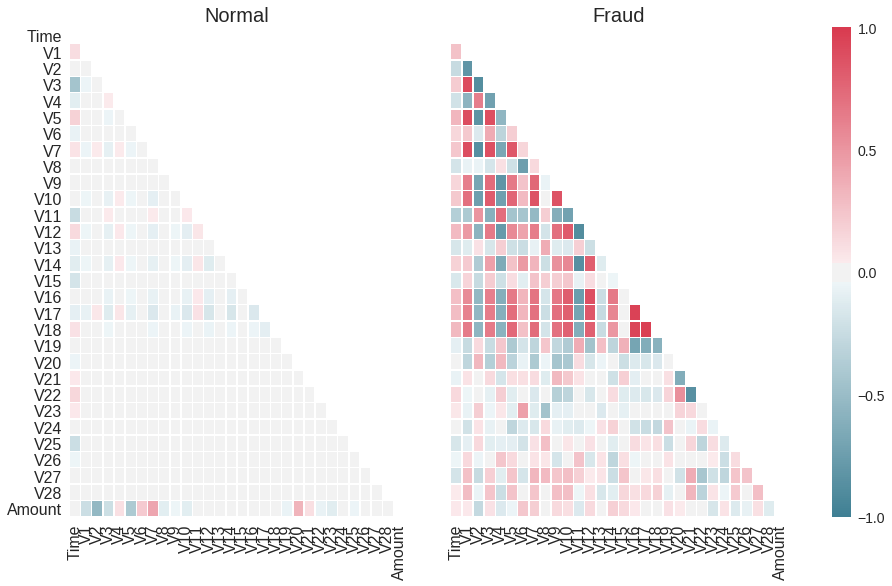

In [15]:
#查看信用卡正常用户与被盗刷用户之间的区别
Xfraud = data_cr.loc[data_cr["Class"] == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = data_cr.loc[data_cr["Class"] == 0]
                  
correlationNonFraud = XnonFraud.loc[:, data_cr.columns != 'Class'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

correlationFraud = Xfraud.loc[:, data_cr.columns != 'Class'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [17]:
correlationNonFraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0000,0.1165,-0.0084,-0.4410,-0.1043,0.1730,-0.0641,0.0842,-0.0360,-0.0106,...,-0.0508,0.0471,0.1443,0.0512,-0.0163,-0.2333,-0.0414,-0.0039,-0.0094,-0.0106
V1,0.1165,1.0000,0.0225,-0.0475,0.0209,-0.0315,-0.0064,-0.0536,0.0044,-0.0190,...,0.0052,0.0015,0.0006,0.0007,0.0003,0.0012,-0.0003,-0.0038,-0.0019,-0.2313
V2,-0.0084,0.0225,1.0000,0.0379,-0.0183,0.0238,0.0049,0.0420,-0.0003,0.0162,...,-0.0044,-0.0032,0.0001,-0.0020,0.0004,-0.0013,-0.0002,0.0023,-0.0005,-0.5365
V3,-0.4410,-0.0475,0.0379,1.0000,0.0396,-0.0488,-0.0133,-0.0849,0.0127,-0.0340,...,0.0093,0.0025,0.0016,0.0006,-0.0009,0.0020,0.0006,-0.0020,-0.0015,-0.2191
V4,-0.1043,0.0209,-0.0183,0.0396,1.0000,0.0208,0.0075,0.0413,-0.0048,0.0200,...,-0.0046,-0.0022,-0.0015,-0.0001,0.0011,0.0000,-0.0014,-0.0010,0.0001,0.0998
V5,0.1730,-0.0315,0.0238,-0.0488,0.0208,1.0000,-0.0061,-0.0541,0.0103,-0.0199,...,0.0057,0.0002,0.0017,0.0016,0.0010,0.0014,-0.0004,-0.0042,-0.0019,-0.3928
V6,-0.0641,-0.0064,0.0049,-0.0133,0.0075,-0.0061,1.0000,-0.0108,0.0114,-0.0057,...,0.0012,0.0006,0.0000,-0.0028,-0.0001,0.0008,0.0003,0.0023,0.0004,0.2164
V7,0.0842,-0.0536,0.0420,-0.0849,0.0413,-0.0541,-0.0108,1.0000,-0.0043,-0.0377,...,0.0112,0.0014,0.0033,0.0027,-0.0000,-0.0008,-0.0000,-0.0084,-0.0024,0.4166
V8,-0.0360,0.0044,-0.0003,0.0127,-0.0048,0.0103,0.0114,-0.0043,1.0000,0.0034,...,0.0005,0.0060,-0.0008,0.0116,-0.0009,-0.0044,-0.0007,-0.0108,0.0002,-0.1067
V9,-0.0106,-0.0190,0.0162,-0.0340,0.0200,-0.0199,-0.0057,-0.0377,0.0034,1.0000,...,0.0050,-0.0025,0.0029,0.0006,-0.0004,0.0003,0.0011,-0.0015,-0.0009,-0.0447


In [18]:
correlationNonFraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [16]:
mask

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,

In [ ]:
#盗刷交易、交易金额和交易次数的关系

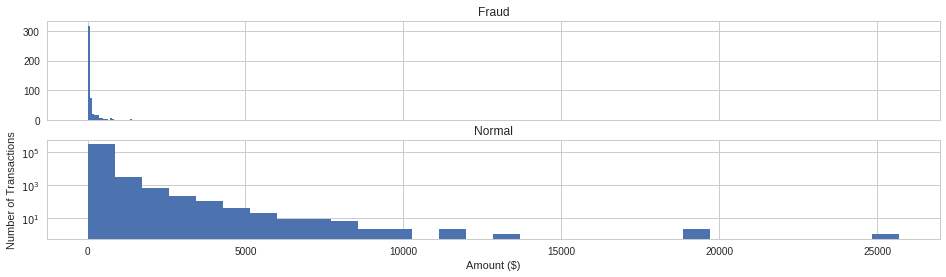

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data_cr["Amount"][data_cr["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_cr["Amount"][data_cr["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

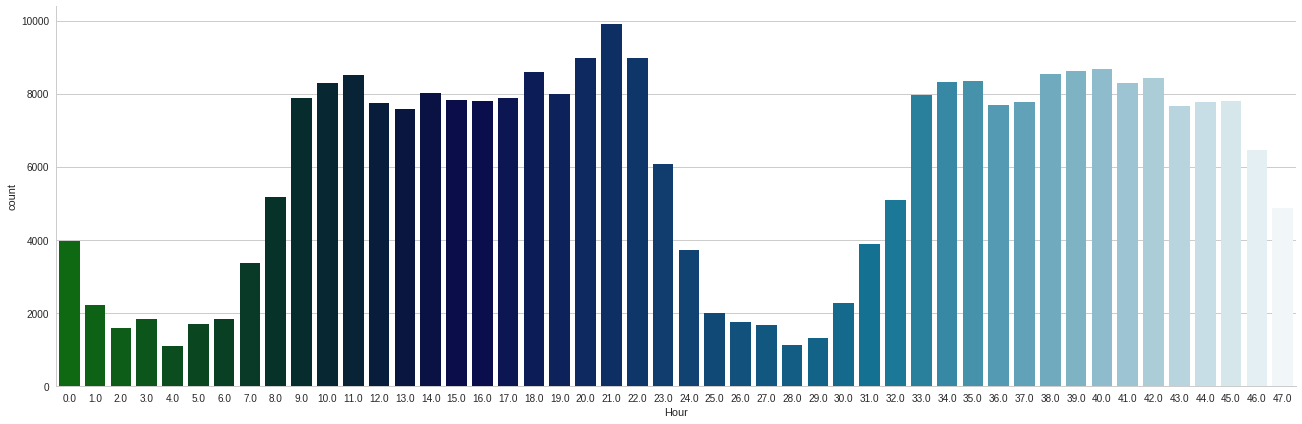

In [23]:
sns.factorplot(x="Hour", data=data_cr, kind="count",  palette="ocean", size=6, aspect=3)

In [ ]:
#盗刷交易、交易金额和交易时间的关系

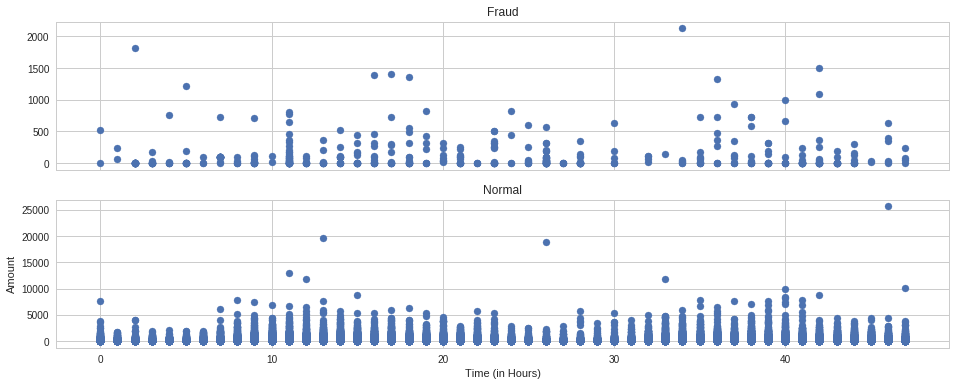

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data_cr["Hour"][data_cr["Class"] == 1], data_cr["Amount"][data_cr["Class"]  == 1])
ax1.set_title('Fraud')

ax2.scatter(data_cr["Hour"][data_cr["Class"] == 0], data_cr["Amount"][data_cr["Class"] == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

In [25]:
print ("Fraud Stats Summary")
print (data_cr["Amount"][data_cr["Class"] == 1].describe())
print ()
print ("Normal Stats Summary")
print (data_cr["Amount"][data_cr["Class"]  == 0].describe())

Fraud Stats Summary
count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

Normal Stats Summary
count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64


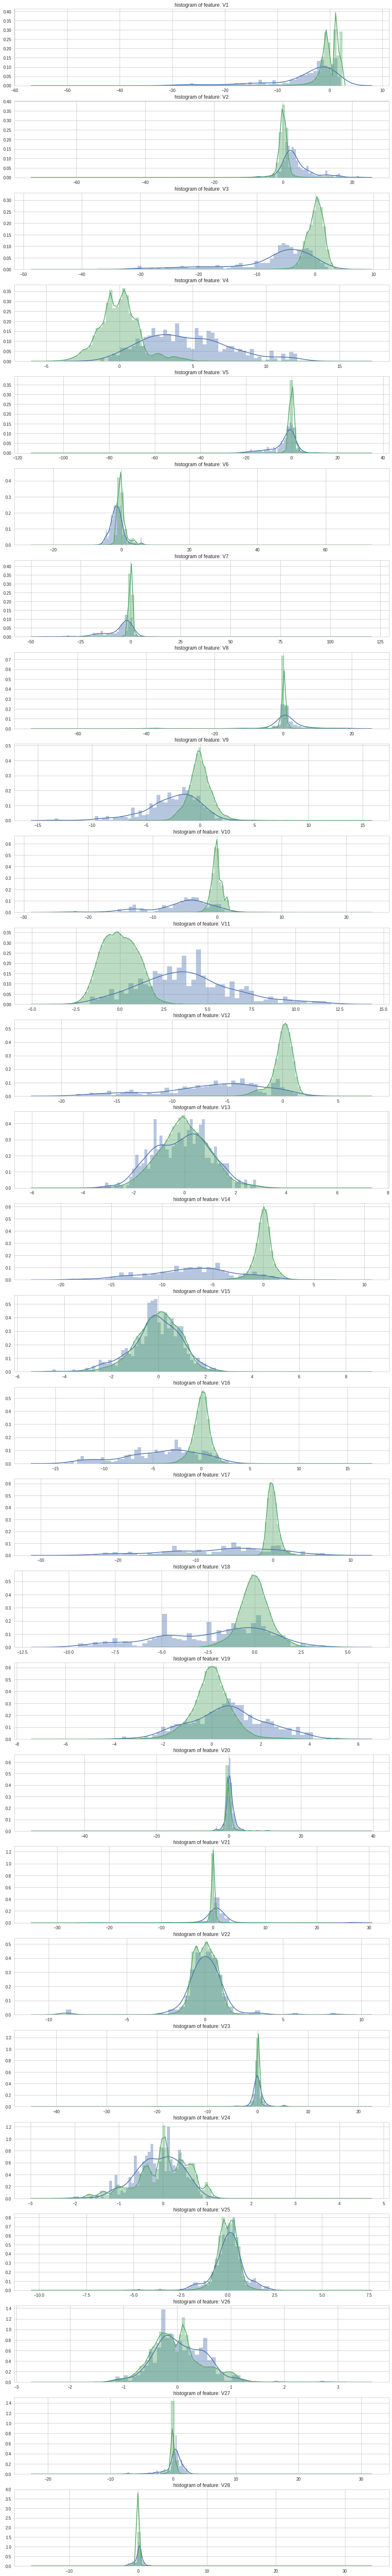

In [26]:
#Select only the anonymized features.
v_feat = data_cr.ix[:,1:29].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_cr[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_cr[cn][data_cr["Class"] == 1], bins=50)
    sns.distplot(data_cr[cn][data_cr["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

上图是不同变量在信用卡被盗刷和信用卡正常的不同分布情况，我们将选择在不同信用卡状态下的分布有明显区别的变量。因此剔除变量V8、V13 、V15 、V20 、V21 、V22、 V23 、V24 、V25 、V26 、V27 和V28变量。这也与我们开始用相关性图谱观察得出结论一致。同时剔除变量Time，保留离散程度更小的Hour变量。

In [28]:
data_cr.iloc[:,1:29].columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [29]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data_cr.drop(droplist, axis = 1)
data_new.shape # 查看数据的维度

(284807, 19)

### 3. 特征缩放

In [30]:
# 对Amount和Hour 进行特征缩放
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
data_new[col] =sc.fit_transform(data_new[col])#对数据进行标准化
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,0,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,0,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,0,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,0,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,0,-1.9603


#### 对特征的重要性进行排序

构建X变量和Y变量。

In [31]:
x_feature = list(data_new.columns)
x_feature.remove('Class')
x_val = data_new[x_feature]
y_val = data_new['Class']

In [35]:
x_val

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,-1.9603
5,-0.4260,0.9605,1.1411,-0.1683,0.4210,-0.0297,0.4762,-0.5687,-0.3714,1.3413,0.3599,-0.1371,0.4017,-0.0581,0.0687,-0.0332,-0.3386,-1.9603
6,1.2297,0.1410,0.0454,1.2026,0.1919,0.2727,-0.0052,0.4650,-0.0993,-1.4169,-0.1538,0.1674,-0.4436,0.0028,-0.6120,-0.0456,-0.3333,-1.9603
7,-0.6443,1.4180,1.0744,-0.4922,0.9489,0.4281,1.1206,0.6154,1.2494,-0.6195,0.2915,-1.3239,-0.0761,-1.2221,-0.3582,0.3245,-0.1901,-1.9603
8,-0.8943,0.2862,-0.1132,-0.2715,2.6696,3.7218,0.3701,-0.3920,-0.4104,-0.7051,-0.1105,0.0744,-0.2101,-0.4998,0.1188,0.5703,0.0194,-1.9603
9,-0.3383,1.1196,1.0444,-0.2222,0.4994,-0.2468,0.6516,-0.7367,-0.3668,1.0176,0.8364,-0.4435,0.7395,-0.5410,0.4767,0.4518,-0.3385,-1.9603


利用随机森林的feature importance对特征的重要性进行排序。

In [33]:
names = data_cr[x_feature].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val, y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('V1', 0.016428960714380998)
('V2', 0.012088954341890348)
('V3', 0.019333047192017873)
('V4', 0.041954380358988699)
('V5', 0.018124180590092021)
('V6', 0.021263258405632889)
('V7', 0.02330647145553924)
('V9', 0.022616308229698158)
('V10', 0.08104934217396946)
('V11', 0.06706027490232476)
('V12', 0.13196226602546979)
('V14', 0.12929955280214372)
('V16', 0.14082738583269536)
('V17', 0.211273164259213)
('V18', 0.019528994094810771)
('V19', 0.020030149135284989)
('Amount', 0.011748452413655337)
('Hour', 0.012104857072192587)


(-1, 18)

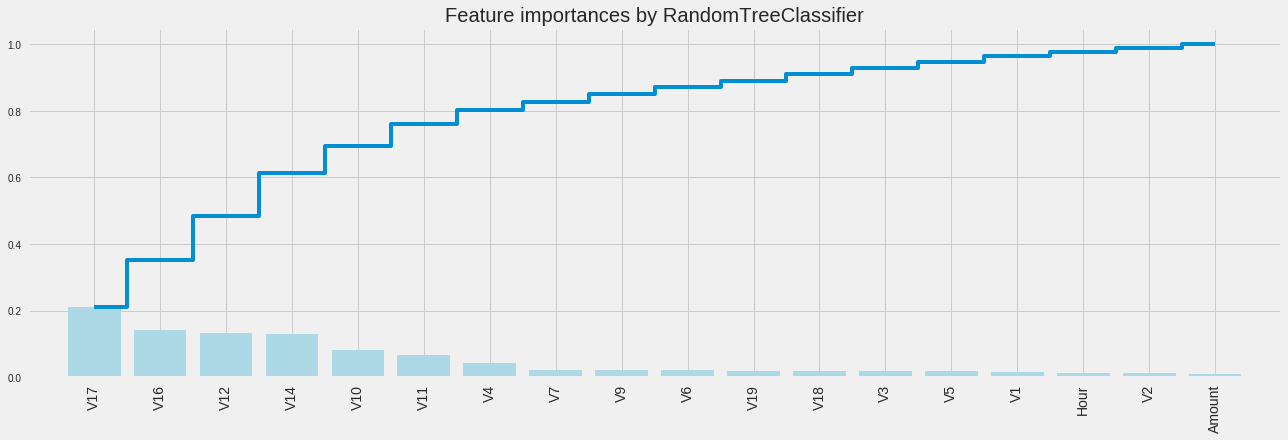

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

### ４．模型训练

处理样本不平衡

In [36]:
# 构建自变量和因变量
X = data_cr[x_feature]
y = data_cr["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：284807; 正样本占99.83%; 负样本占0.17%
特征维数： 18


In [37]:
X

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,149.6200,0.0000
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,2.6900,0.0000
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,378.6600,0.0000
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,123.5000,0.0000
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,69.9900,0.0000
5,-0.4260,0.9605,1.1411,-0.1683,0.4210,-0.0297,0.4762,-0.5687,-0.3714,1.3413,0.3599,-0.1371,0.4017,-0.0581,0.0687,-0.0332,3.6700,0.0000
6,1.2297,0.1410,0.0454,1.2026,0.1919,0.2727,-0.0052,0.4650,-0.0993,-1.4169,-0.1538,0.1674,-0.4436,0.0028,-0.6120,-0.0456,4.9900,0.0000
7,-0.6443,1.4180,1.0744,-0.4922,0.9489,0.4281,1.1206,0.6154,1.2494,-0.6195,0.2915,-1.3239,-0.0761,-1.2221,-0.3582,0.3245,40.8000,0.0000
8,-0.8943,0.2862,-0.1132,-0.2715,2.6696,3.7218,0.3701,-0.3920,-0.4104,-0.7051,-0.1105,0.0744,-0.2101,-0.4998,0.1188,0.5703,93.2000,0.0000
9,-0.3383,1.1196,1.0444,-0.2222,0.4994,-0.2468,0.6516,-0.7367,-0.3668,1.0176,0.8364,-0.4435,0.7395,-0.5410,0.4767,0.4518,3.6800,0.0000


In [39]:
y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [40]:
y.shape

(284807,)

In [42]:
y.shape[0]

284807

In [38]:
n_sample

284807

In [43]:
X.shape

(284807, 18)

In [57]:
list1 = ['a', 'b']
list2 = ['c', 'd']
for i ,j in itertools.product(list1, list2):
    print(i,j)

a c
a d
b c
b d


In [44]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_sample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：568630; 正样本占50.00%; 负样本占50.00%


构建分类器进行训练

In [45]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.90153


Recall metric in the testing dataset:  0.803169020277


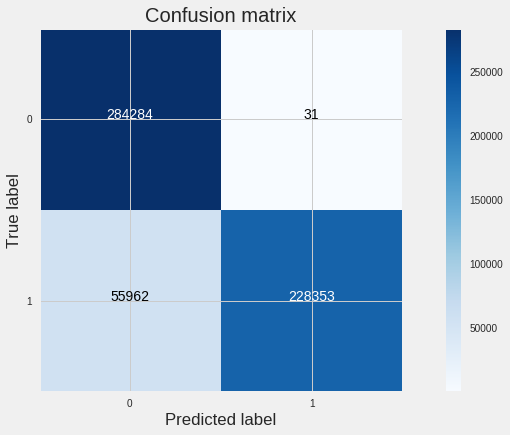

In [47]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
##################################################################################

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predicted1)  # 生成混淆矩阵
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

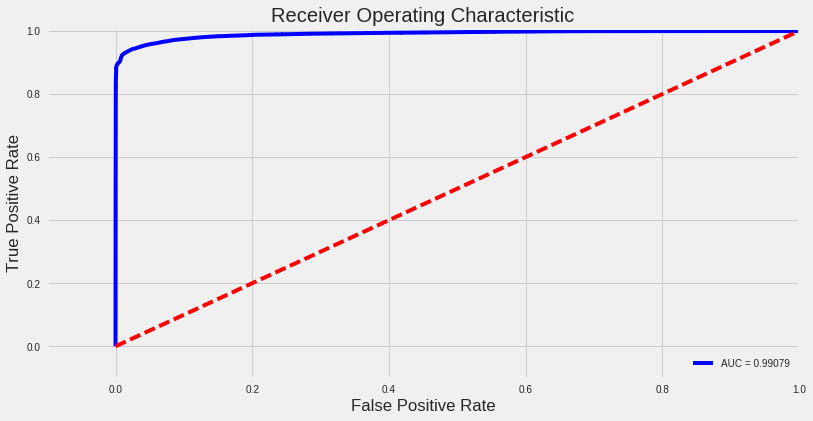

In [48]:
y_pred1_prob = clf1.predict_proba(X)[:, 1]  # 阈值默认值为0.5

fpr, tpr, thresholds = roc_curve(y,y_pred1_prob)
roc_auc = auc(fpr,tpr)

# 绘制 ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5 模型评估与优化

cross-validation+grid search

In [49]:
#寻找最优的算法
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样
# 构建参数组合
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search.fit(X_train, y_train) # 使用训练集学习算法

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
results = pd.DataFrame(grid_search.cv_results_) 
best = np.argmax(results.mean_test_score.values)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.95816


In [51]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))

Test set accuracy score: 0.95857


In [52]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96     85172
          1       0.98      0.93      0.96     85417

avg / total       0.96      0.96      0.96    170589



In [53]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.95816


Recall metric in the testing dataset:  0.932402215016


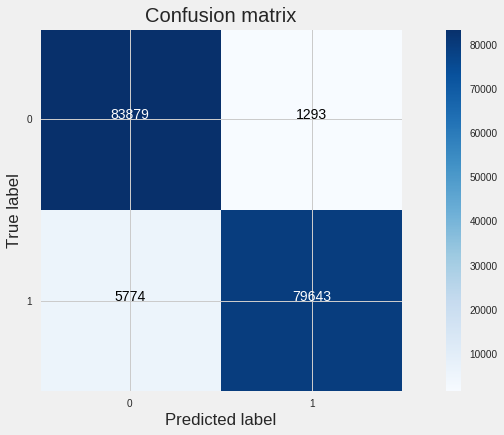

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

模型评估


Recall metric in the testing dataset:  0.982556165634
Recall metric in the testing dataset:  0.967512321903
Recall metric in the testing dataset:  0.952714330871
Recall metric in the testing dataset:  0.941967055738
Recall metric in the testing dataset:  0.932402215016
Recall metric in the testing dataset:  0.926197361181
Recall metric in the testing dataset:  0.919734947376
Recall metric in the testing dataset:  0.911867661004
Recall metric in the testing dataset:  0.89932917335


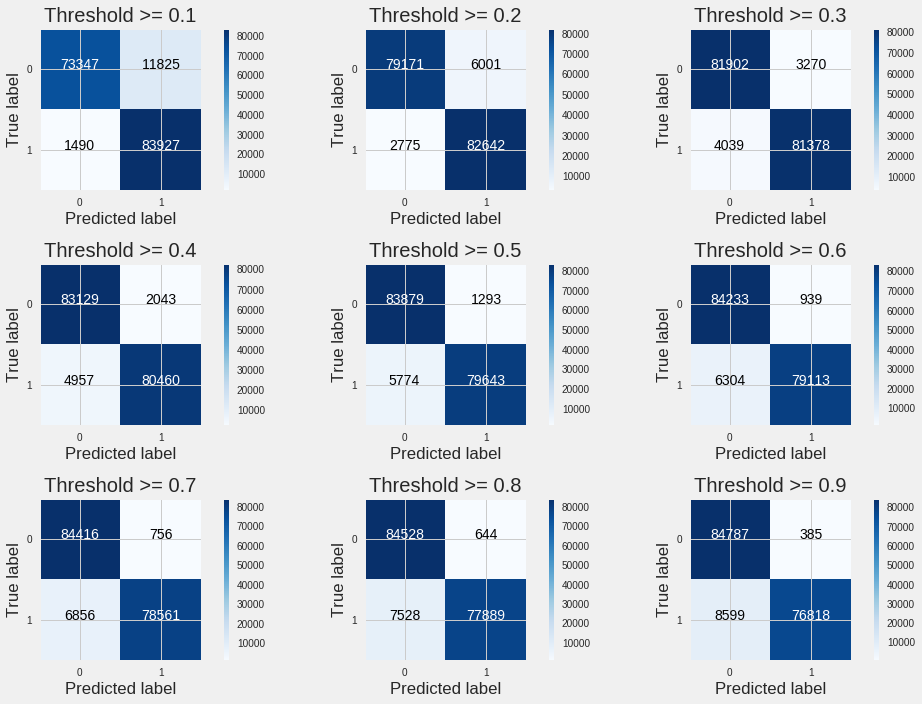

In [60]:
y_pred_proba = grid_search.predict_proba(X_test)  #predict_prob 获得一个概率值

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          ,title='Threshold >= '+str(i)
                         )


In [70]:
for i,color in zip(thresholds,colors):
    print(i,color)

0.1 turquoise
0.2 darkorange
0.3 cornflowerblue
0.4 teal
0.5 red
0.6 yellow
0.7 green
0.8 blue
0.9 black


In [73]:
from itertools import cycle

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #预测出来的概率值是否大于阈值  

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.legend(loc="lower left")

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [75]:
precision_recall_curve??
